In [1]:
# declare the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
import math

In [2]:
# read the data
df = pd.read_csv("house_prices_dataset_cleaned.csv")

# display the first 5 rows of the data
print(df.head())

   sqft (1000s)  price (1000$)
0         2.234      24.015334
1         0.970      20.220336
2         0.518       6.798509
3         2.625      30.543294
4         2.980      51.810683


In [3]:
# x_train is the input variable (size in 1000 square feet)
# y_train is the target (price in 1000s of dollars)
# convert the data to numpy arrays for easier cleaning process using numpy
x_train = df['sqft (1000s)'].to_numpy()
y_train = df['price (1000$)'].to_numpy()
print(type(x_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


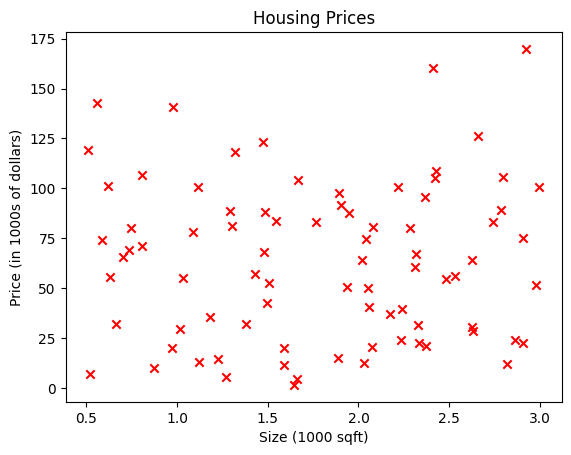

In [4]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

In [5]:
# use 'given' parameters (w, b), can change to new parameters for testing or sth else
w = 50
b = 10
print(f"w: {w}")
print(f"b: {b}")

w: 50
b: 10


In [6]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      f_wb (ndarray (m,)): model prediction
    """
    # m is the total of training data
    m = x.shape[0]
    # create f_wb as y-hat to store prediction
    f_wb = np.zeros(m)
    # store y-hat (prediction)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

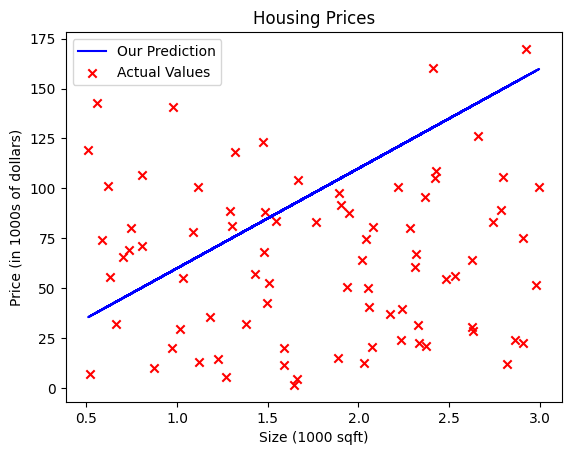

In [7]:
# start prediction
tmp_f_wb = compute_model_output(x_train, w, b)

# Plot model prediction
plt.plot(x_train, tmp_f_wb, c='b', label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

In [8]:
# new example with 2400 sqft   
x_i = 2.4
cost_1200sqft = w * x_i + b    

print(f"${cost_1200sqft:.0f} thousand dollars")

$130 thousand dollars


In [9]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # m is the number of training examples
    m = x.shape[0] 
    # cost_sum is used to store the total cost
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

In [10]:
# calculate the total cost
cost_sum = compute_cost(x_train, y_train, w, b)
print(f"{cost_sum:.2f}")

"""
The cost is too high that is considered as a bad model (underfitting). Therefore, Gradient Descent appears to be a good and simple solution to minimize the cost.
"""

2020.92


'\nThe cost is too high that is considered as a bad model (underfitting). Therefore, Gradient Descent appears to be a good and simple solution to minimize the cost.\n'

In [11]:
# This function is used to compute gradient, which is crucial part for Gradient Descent
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # m is the number of training examples
    m = x.shape[0]    
    # store gradient with respect to w and b (partial derivatives)
    dj_dw = 0
    dj_db = 0
    # compute gradient of the cost function with respect to w and b
    for i in range(m):  
        # calculate y-hat
        f_wb = w * x[i] + b 
        # calculate partial derivatives with respect to w and b, respectively
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        # store gradients
        dj_dw += dj_dw_i 
        dj_db += dj_db_i
    # according to formula of partial derivatives
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [12]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters 
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration, and (w,b)
        if i<100000:      # prevent resource exhaustion 
            J_history.append(cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w, b and J, (w,b) history for graphing

In [13]:
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w, b, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 1.93e+03  dj_dw:  8.864e+01, dj_db:  3.535e+01   w:  4.911e+01, b: 9.64649e+00
Iteration 1000: Cost 7.95e+02  dj_dw:  1.103e+00, dj_db: -2.219e+00   w:  1.071e+01, b: 4.23922e+01
Iteration 2000: Cost 7.71e+02  dj_dw:  3.502e-01, dj_db: -7.045e-01   w:  4.153e+00, b: 5.55856e+01
Iteration 3000: Cost 7.68e+02  dj_dw:  1.112e-01, dj_db: -2.236e-01   w:  2.071e+00, b: 5.97735e+01
Iteration 4000: Cost 7.68e+02  dj_dw:  3.529e-02, dj_db: -7.098e-02   w:  1.410e+00, b: 6.11029e+01
Iteration 5000: Cost 7.68e+02  dj_dw:  1.120e-02, dj_db: -2.253e-02   w:  1.201e+00, b: 6.15249e+01
Iteration 6000: Cost 7.68e+02  dj_dw:  3.556e-03, dj_db: -7.152e-03   w:  1.134e+00, b: 6.16588e+01
Iteration 7000: Cost 7.68e+02  dj_dw:  1.129e-03, dj_db: -2.270e-03   w:  1.113e+00, b: 6.17013e+01
Iteration 8000: Cost 7.68e+02  dj_dw:  3.583e-04, dj_db: -7.206e-04   w:  1.106e+00, b: 6.17148e+01
Iteration 9000: Cost 7.68e+02  dj_dw:  1.137e-04, dj_db: -2.287e-04   w:  1.104e+00, b: 6.17191e+01


In [14]:
# Compute y-hat again with optimized parameters
tmp_f_wb = compute_model_output(x_train, w_final, b_final)

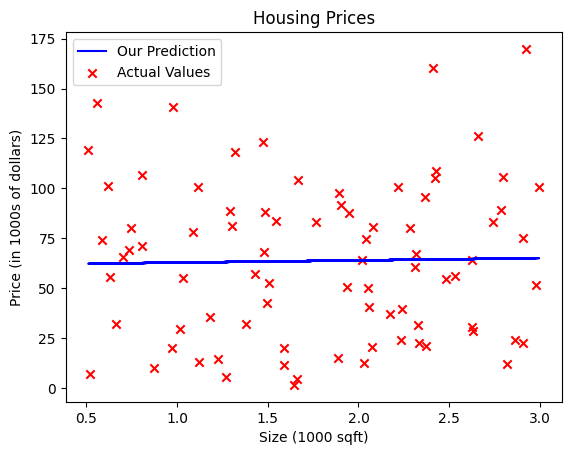

In [15]:
# Plot model prediction again
plt.plot(x_train, tmp_f_wb, c='b', label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

In [16]:
# calculate the total cost again
cost_sum = compute_cost(x_train, y_train, w_final, b_final)
print(f"{cost_sum:.2f}")

# The cost now is just approximate one=third of initial cost. However, using linear regression for this dataset is not good, because y-hat and true value on the plot are still much different. So there may be some new approachs

767.91


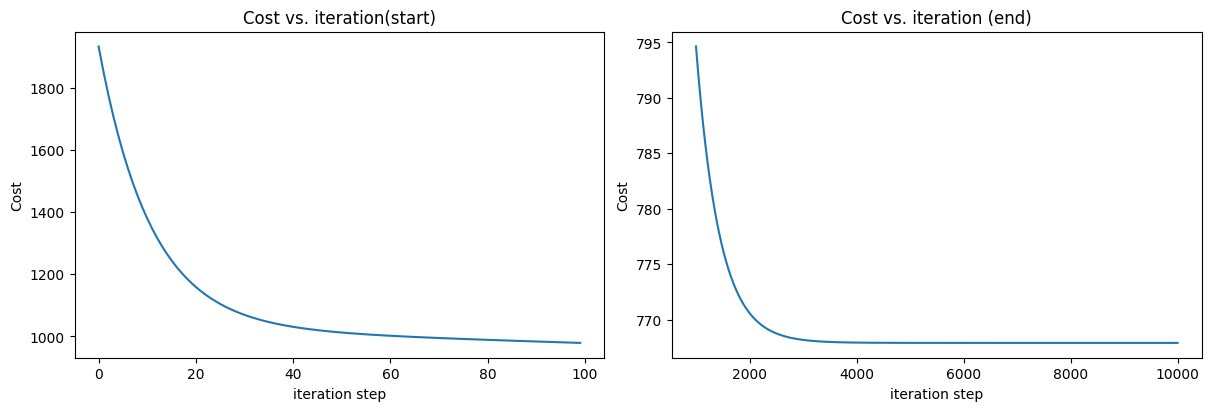

In [17]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()